###퀴즈1

In [8]:
#그래프 정의
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J'],
    'F': [], 'G': [], 'H': [], 'I': [], 'J': []
}

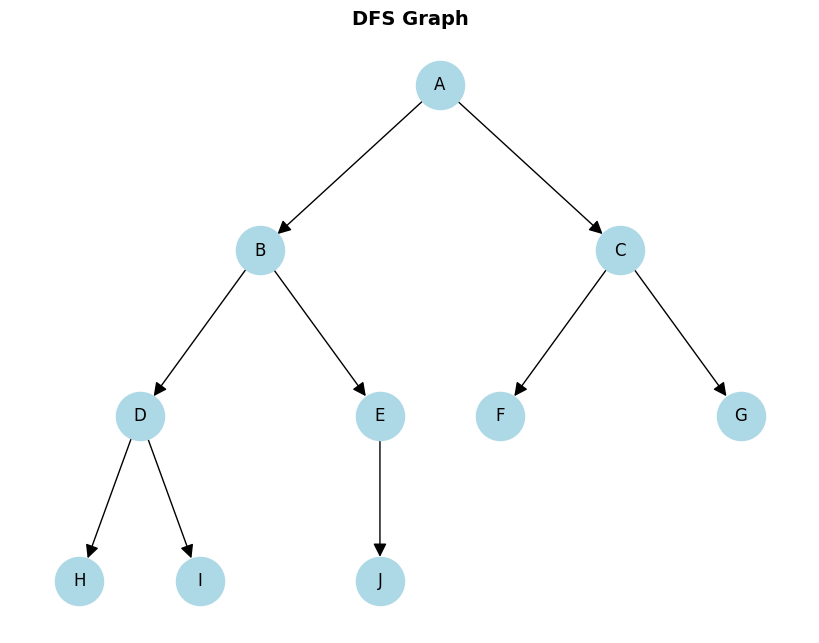

"DFS는 깊이 우선 탐색으로 한 방향으로 끝까지 탐색함. \n방법: \n1) (아래 시각화 사진 참고) 'A'에서 출발. \n2) A의 자식은 B, C인데, 가장 왼쪽 자식 B를 먼저 감.\n3) 그럼 B의 자식은 D, E인데, 다시 왼쪽인 D로 이동\n4) D의 자식은 H, I 중에서 또 왼쪽인 H로 이동.\n5) H는 더 이상 자식이 없으니까 여기서 종료."

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프를 networkx 형태로 변환
G = nx.DiGraph(graph)

# 노드 위치 설정 (계층적 배치)
pos = {
    'A': (0, 3),
    'B': (-1.5, 2), 'C': (1.5, 2),
    'D': (-2.5, 1), 'E': (-0.5, 1), 'F': (0.5, 1), 'G': (2.5, 1),
    'H': (-3, 0), 'I': (-2, 0), 'J': (-0.5, 0)
}

plt.figure(figsize=(8, 6))

# 모든 노드와 엣지 그리기
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, arrowsize=20, font_size=12)

plt.title("DFS Graph", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()


####설명####
'''DFS는 깊이 우선 탐색으로 한 방향으로 끝까지 탐색함.
방법:
1) (아래 시각화 사진 참고) 'A'에서 출발.
2) A의 자식은 B, C인데, 가장 왼쪽 자식 B를 먼저 감.
3) 그럼 B의 자식은 D, E인데, 다시 왼쪽인 D로 이동
4) D의 자식은 H, I 중에서 또 왼쪽인 H로 이동.
5) H는 더 이상 자식이 없으니까 여기서 종료.'''

In [2]:
#### 코드로 구현한 버전####

# 깊이 우선 탐색(DFS) 함수
def dfs(node, visited=None, path_trace=None):
    if visited is None:
        visited = []
    if path_trace is None:
        path_trace = []

    visited.append(node)
    path_trace.append(node)

    # 처음 왼쪽 끝 노드에 도착했을 때 출력하고 종료
    if not graph[node]:
        print("첫 번째 도달 경로:", "->".join(path_trace))
        return

    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, visited, path_trace)
            break  # 첫 번째 경로만 필요해서 더 이상의 탐색은 하지 않도록 break

    path_trace.pop()

# 실행 시작
dfs('A')

첫 번째 도달 경로: A->B->D->H


###퀴즈2

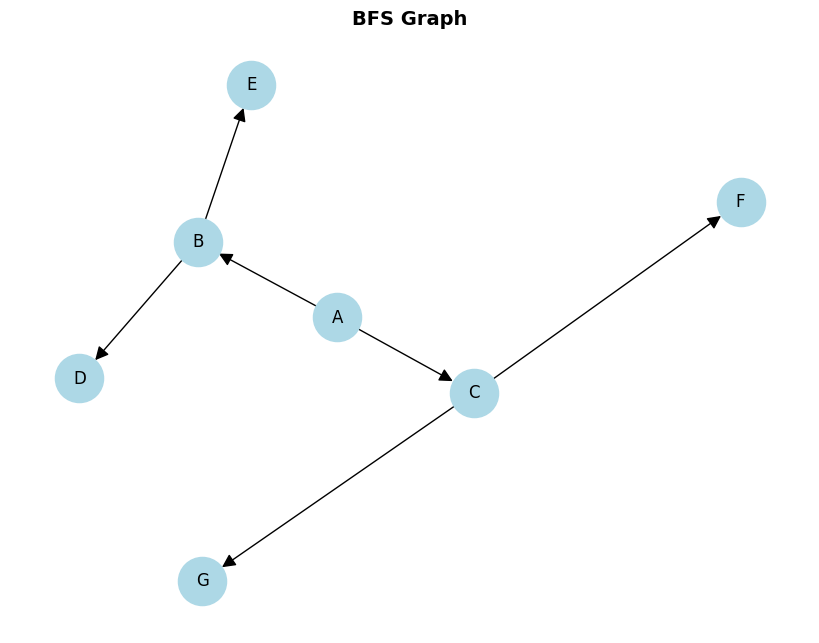

"\nBFS는 가까운 곳에서부터 넓게 퍼져 나가는 방식.\n\n단계별 방식 설명: \n1) 'A'에서 출발.\n2) A의 자식 B, C를 알파벳 순으로 큐에 넣음 ->[B, C]\n3) B 방문 -> 자식 D, E 추가 -> 큐: [C, D, E]\n4) C 방문 -> 자식 F, G 추가 ->> 큐: [D, E, F, G]\n5) D 방문 (4번째), 이어서 E 방문 (5번째)\n\n따라서 다섯 번째 방문 노드는 'E'\n"

In [29]:
## 시각화로 먼저 확인해보기##

# 그래프 수정 및 시각화 (변경된 구조 반영)
import networkx as nx
import matplotlib.pyplot as plt

# 수정된 그래프 정의
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [], 'E': [], 'F': [], 'G': []
}

# NetworkX 그래프 생성
G = nx.DiGraph(graph)

# 자동 레이아웃
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1200, arrowsize=20, font_size=12)

plt.title("BFS Graph", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

####설명####
'''
BFS는 가까운 곳에서부터 넓게 퍼져 나가는 방식.

단계별 방식 설명:
1) 'A'에서 출발.
2) A의 자식 B, C를 알파벳 순으로 큐에 넣음 ->[B, C]
3) B 방문 -> 자식 D, E 추가 -> 큐: [C, D, E]
4) C 방문 -> 자식 F, G 추가 ->> 큐: [D, E, F, G]
5) D 방문 (4번째), 이어서 E 방문 (5번째)

따라서 다섯 번째 방문 노드는 'E'
'''

In [30]:
### 최종 순서 코드 확인  -> 정답은 'E'가 맞음

from collections import deque

# BFS 탐색으로 다섯 번째 방문 노드 찾기
def bfs_fifth_visit(start):
    visited = []
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.append(node)
            queue.extend(sorted(graph[node]))  # 알파벳 순 정렬

            # 다섯 번째 방문 노드 찾기
            if len(visited) == 5:
                return node, visited

# 실행
fifth_node, visited_order = bfs_fifth_visit('A')
fifth_node, visited_order

('E', ['A', 'B', 'C', 'D', 'E'])

### 퀴즈 3

Kruskal 알고리즘은 가중치가 가장 낮은 간선부터 하나씩 선택해가면서 사이클이 생기지 않도록 트리를 만들어가는 방식.

[선택 기준 설명]
- 그래서 먼저 0-1 (가중치 1)을 선택하고, 그다음으로 1-2 (가중치 2), 그리고 2-3 (가중치 3)을 선택함. (아직 사이클이 없기 때문에 다 포함시킴)
- 마지막 간선인 3-0 (가중치 4)은 이미 0에서 3까지 가는 경로가 생겨버렸기 때문에 이걸 포함시키면 사이클이 생기게 돼서 제외함.

결과적으로 선택된 간선은 0-1, 1-2, 2-3 ->
총 가중치는 1 + 2 + 3 = 6

In [16]:
#### 코드로 확인하기 ###

# 그래프 정의
G = nx.Graph()
edges = [
    (0, 1, 1),
    (1, 2, 2),
    (2, 3, 3),
    (3, 0, 4)
]

G.add_weighted_edges_from(edges)

# Kruskal 알고리즘으로 MST 계산
mst = nx.minimum_spanning_tree(G, algorithm='kruskal')

# MST 총 비용 계산
total_cost = sum(data['weight'] for u, v, data in mst.edges(data=True))

# MST에 포함된 간선과 총 비용 결과 출력
mst_edges = [(u, v, data['weight']) for u, v, data in mst.edges(data=True)]
print("MST 총 비용:", total_cost)
print("\n선택된 간선 목록:")
for u, v, weight in mst_edges:
    print(f"- {u} - {v}, 비용: {weight}")

MST 총 비용: 6

선택된 간선 목록:
- 0 - 1, 비용: 1
- 1 - 2, 비용: 2
- 2 - 3, 비용: 3


###퀴즈 4

In [18]:
#미팅 시간 정의
meetings = [
    (9, 9.75),   # 회의 A: 09:00~09:45
    (9.5, 10.5), # 회의 B: 09:30~10:30
    (10, 10.33), # 회의 C: 10:00~10:20
    (10.5, 11),  # 회의 D: 10:30~11:00
    (11, 12),    # 회의 E: 11:00~12:00
    (9.25, 10),  # 회의 F: 09:15~10:00
    (13, 13.5),  # 회의 G: 13:00~13:30
    (12.5, 13.5),# 회의 H: 12:30~13:30
    (14, 15),    # 회의 I: 14:00~15:00
    (15, 16)     # 회의 J: 15:00~16:00
]

1. 핵심 전략: 가장 빨리 끝나는 회의부터 선택하여 더 많은 회의를 넣을 수 있게 하는 방식.

2. 방식 설명:
- 종료 시간이 가장 빠른 (9,9.75)부터 시작
- 겹치지 않으면서 다음 회의 (10, 10.33) 선택.
- (10.5, 11), 이어서 (11, 12) 도 연속해서 가능.
- 이후 (12.5, 13.5)는 겹쳐서 제외함.대신 (13, 13.5) 선택.
- 마지막으로 (14,15)와 (15,16)까지 선택.

In [23]:
## 코드로 확인하기

# 종료 시간 기준으로 정렬
meetings.sort(key=lambda x: x[1])

# 탐욕 알고리즘 적용
selected = []
end_time = 0

for start, end in meetings:
    if start >= end_time:
        selected.append((start, end))
        end_time = end

selected, len(selected)

([(9, 9.75),
  (10, 10.33),
  (10.5, 11),
  (11, 12),
  (13, 13.5),
  (14, 15),
  (15, 16)],
 7)

### 퀴즈 5

In [24]:
#퀴즈 5-1

# 동전 단위
coins = [500, 400, 100]  # 내림차순 정렬 (탐욕 알고리즘 조건)
amount = 1200  # 거슬러 줄 금액

#탐욕 알고리즘 적용
n = amount
count = 0
used = []

for coin in coins:
    num = n // coin
    if num > 0:
        used.append((coin, num))
        count += num
        n %= coin

# 탐욕 알고리즘 결과 저장
greedy_result = used
greedy_total = count
remaining = n

greedy_result, greedy_total, remaining

([(500, 2), (100, 2)], 4, 0)

퀴즈 5-2

이 조합은 최적해가 아니다.

이유: 탐욕 알고리즘은 먼저 큰 단위 동전 500원을 최대한 사용한 다음, 남은 금액을 100원으로 채웠다. 하지만 이 경우, 더 적은 개수로도 거슬러줄 수 있다.

퀴즈 5-3

탐욕 알고리즘은 항상 "지금 가장 큰 단위를 쓰는 게 최선"이라고 가정한다.
하지만 이번 경우처럼 중간 단위 동전(400원)이 100원 여러 개보다 더 효율적인 경우에는 이 전략이 실패한다.

즉,지역적으로 최선이 전체적으로 최선(최적해)이 아닐 수 있기 때문.
동전 단위가 서로 배수 관계가 아닐 때 자주 발생한다.

[최적 조합 예시]

400원 x 3개 -> 1,200원 완성

총 동전 수: 3개

-> 탐욕: 4개, 최적: 3개 -> 최적해가 아님

In [25]:
## 코드로 최적 조합 확인해보기 -> 400원 세 개가 최적임.

from itertools import product

# brute-force 방식-> 가능한 개수 조합 중 최소 동전 수 조합을 탐색
min_count = float('inf')
best_combo = None

# coin[i]는 최대 amount // coin[i] 개까지 가능
for a in range(amount // coins[0] + 1):
    for b in range(amount // coins[1] + 1):
        for c in range(amount // coins[2] + 1):
            total = coins[0]*a + coins[1]*b + coins[2]*c
            count = a + b + c
            if total == amount and count < min_count:
                min_count = count
                best_combo = [(coins[0], a), (coins[1], b), (coins[2], c)]

best_combo, min_count

([(500, 0), (400, 3), (100, 0)], 3)

###퀴즈 6

1. 알고리즘 이름: Brute Force Algorithm (무차별 대입 알고리즘)
2. 동작방식:
- 가능한 모든 4자리 숫자 조합을 처음부터 끝까지 하나씩 다 시도해보는 방식
- 0000, 0001, 0002, ... 9999까지 전부 시도
3. 장점
- 단순하고 구현이 매우 쉬움
- 정답이 언젠가는 무조건 나옴 (완전 탐색)
- 문제 구조나 조건을 몰라도 작동 가능
4. 단점
- 시간이 오래 걸림 (특히 경우의 수가 많아질수록)
- 입력 크기가 조금만 커져도 폭발적으로 느려짐 (비효율적)
- 효율성이 매우 낮음
- 실제 환경에서는 보안상 위험함.

In [27]:
# 비밀번호 맞추기 ex. 실제 비밀번호가 0917라고 가정
actual_password = "0917"

# 모든 조합을 시도 (0000 ~ 9999)
for num in range(10000):
    attempt = f"{num:04d}"  # 항상 4자리 문자열로 유지 (ex. 0071)
    if attempt == actual_password:
        print(f"비밀번호를 찾았습니다: {attempt}")
        break

비밀번호를 찾았습니다: 0917
